In this document I'll create and modify variables necessary for my machine learning

In [1]:
import pandas as pd

In [2]:
hh = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Data_Wrangling/hh_2019.csv")

In [3]:
#in previous work with the data, I've noticed that hrhhid is almost unique but approximatley 5000 households share the same ID (duplexes or roommates I've been told)
#the two ID numbers have to be combines to have as an index
unique_id = hh['hrhhid'] + hh['hrhhid2']
hh.insert(0,"id",unique_id)

In [4]:
#drop irrelevant ID columns
hh = hh.drop(hh.columns[1:4], axis=1)

In [5]:
#replace all of the unknowns (usually as 99) with nul
hh = hh.replace(99,'')

Here I create dummy variables for certain variables with 3-5 outcomes, to simplify regressions. These are categorical variables that really don't need to be categories.

In [6]:
#make an urban variable that is 1 if in or around a metro area and zero if not
hh['urban'] = hh['gtcbsast']
hh['urban'] = hh['urban'].replace(2,1)
hh['urban'] = hh['urban'].replace(3,0)
hh['urban'] = hh['urban'].replace(4,'')
hh = hh.drop(['gtcbsast'], axis=1)

In [7]:
hh['bank_prev'] = hh['hbnkprev']
hh['bank_prev'] = hh['bank_prev'].replace(2,0)
hh['bank_prev'] = hh['bank_prev'].replace(-1,0)

In [8]:
hh['unbanked'] = hh['hunbnk']
hh['unbanked'] = hh['unbanked'].replace(2,0)
hh = hh.drop(['hunbnk'], axis=1)

In [9]:
hh['poverty'] = hh['hhincome']
hh['poverty'] = hh['poverty'].replace(2,0)
hh['poverty'] = hh['poverty'].replace(3,0)
hh['poverty'] = hh['poverty'].replace(4,0)
hh['poverty'] = hh['poverty'].replace(5,0)

In [10]:
#create a binary that is 1 if repondent is a citizen and 0 if respondent is not
hh['citizen'] = hh['pnativ']
hh['citizen'] = hh['citizen'].replace(2,1)
hh['citizen'] = hh['citizen'].replace(3,0)

In [11]:
#binary where 1 is a native born and 0 is foreign born
hh['native_born'] = hh['pnativ']
hh['native_born'] = hh['native_born'].replace(2,0)
hh['native_born'] = hh['native_born'].replace(3,0)
hh = hh.drop(['pnativ'], axis=1)

In [12]:
#fix the homeownership variable to be a dummy
#1 is homeowner 0 is not
hh['homeowner'] = hh['hhtenure']
hh['homeowner'] = hh['homeowner'].replace(2,0)
hh = hh.drop(['hhtenure'], axis=1)

In [13]:
#fix the unbanked variable to be a dummy
#1 is unemployed 0 is not
hh['unemployed'] = hh['pempstat']
hh['unemployed'] = hh['unemployed'].replace(1,0)
hh['unemployed'] = hh['unemployed'].replace(3,0)
hh['unemployed'] = hh['unemployed'].replace(2,1)

In [14]:
#fix volatility dummy
#1 is income volitility 0 is stablle
hh['inc_vol'] = hh['hincvolv2']
hh['inc_vol'] = hh['inc_vol'].replace(1,0)
hh['inc_vol'] = hh['inc_vol'].replace(2,1)
hh = hh.drop(['hincvolv2'], axis=1)

In [15]:
#fix the internet acces variable variable to be a dummy
#1 has internet access 0 does not
hh['internet'] = hh['hintaccv2']
hh['internet'] = hh['internet'].replace(2,0)
hh = hh.drop(['hintaccv2'], axis=1)

In [16]:
#fix the disability variable to be a dummy
#1 is udisabled 0 is not
hh['disability'] = hh['pdisabl_age25to64']
hh['disability'] = hh['disability'].replace(2,0)
hh = hh.drop(['pdisabl_age25to64'], axis=1)

Here I create dummy variables based on clusered outcomes

In [17]:
#identify clusters in age

In [18]:
agegrp = pd.crosstab(hh.unbanked,hh.prtage)
agegrp = agegrp.transpose()
agegrp.reset_index(inplace=True)
agegrp.columns = ['age','num_banked','num_unbanked','num_NA']
agegrp['pct_unb'] = 100*agegrp['num_unbanked']/(agegrp['num_unbanked']+ agegrp['num_banked'])
agegrp

,age,num_banked,num_unbanked,num_NA,pct_unb
0,-1,0,0,21340,NaN
1,15,2,1,8,33.333333
2,16,15,1,14,6.250000
3,17,14,1,12,6.666667
4,18,42,2,32,4.545455
...,...,...,...,...,...
63,77,337,12,145,3.438395
64,78,345,8,141,2.266289
65,79,286,6,137,2.054795
66,80,1102,25,528,2.218279


In [19]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotnine as p9

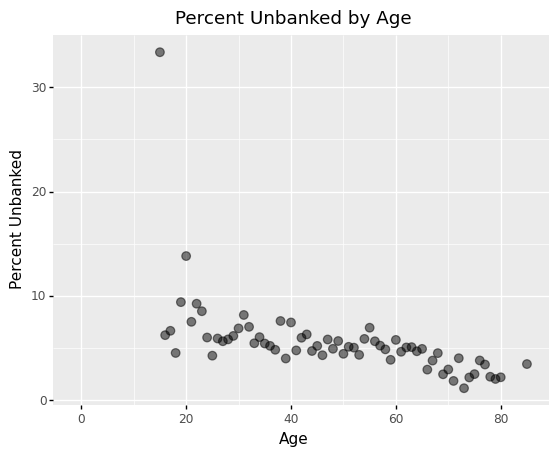

<ggplot: (8782058041338)>

In [20]:
(p9.ggplot(data=agegrp, mapping=p9.aes(x='age', y='pct_unb'))+
 geom_point(size=3,alpha=.5,show_legend=True) +
 labs(x='Age', y='Percent Unbanked',color="",title="Percent Unbanked by Age")
)

Originally, I planned to bin age or at least create a few binary variables; now, however, it seems that age flows fairly linearly and doesn't need any binsing

In [21]:
#visually identify any unbanked clusters in race
racegrp = pd.crosstab(hh.unbanked,hh.praceeth3)
racegrp = racegrp.transpose()
racegrp.reset_index(inplace=True)
racegrp.columns = ['race','num_banked','num_unbanked','num_NA']
racegrp['pct_unb'] = 100*racegrp['num_unbanked']/(racegrp['num_unbanked']+ racegrp['num_banked'])
racegrp['race_name'] = ['Black', 'Hispanic', 'Asian', 'Native', 'Pacific', 'White', 'Biracial']
racegrp

,race,num_banked,num_unbanked,num_NA,pct_unb,race_name
0,1,2699,455,2012,14.426126,Black
1,2,3110,416,2011,11.798071,Hispanic
2,3,1394,24,746,1.692525,Asian
3,4,267,55,153,17.080745,Native
4,5,77,4,65,4.938272,Pacific
5,6,23333,634,10774,2.645304,White
6,7,413,23,21538,5.275229,Biracial


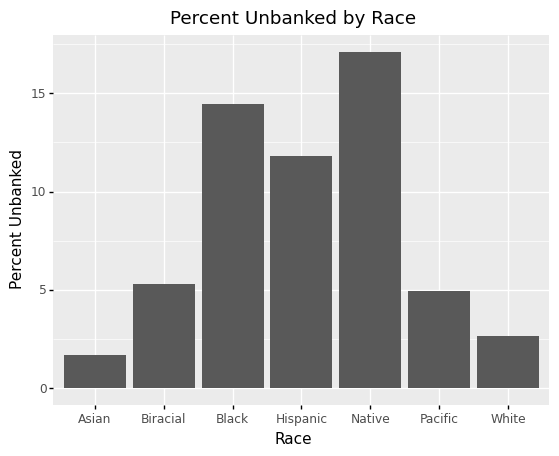

<ggplot: (8782058139305)>

In [22]:
(ggplot(racegrp)       
 + aes(x='race_name', y='pct_unb')    
 + geom_bar(stat="identity") # defining the type of plot to use
 + labs(title='Percent Unbanked by Race', x='Race', y='Percent Unbanked') 
)

For Race, I think we can justify Bins, especially since it is purely categorical

In [23]:
#splid data by under 5 and over 5
#1 for White or Asian American or Pacific Islander, 0 for Other People of Color
hh['White_or_AAPI'] = hh['praceeth3']
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(1,0)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(2,0)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(3,1)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(4,0)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(5,1)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(6,1)
hh['White_or_AAPI'] = hh['White_or_AAPI'].replace(7,0)

# Export Main Dataset for Pre-Processing Review

In [24]:
hh.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Data_Wrangling/hh2.csv")

# Export Datasets for Slide Graphing

In [25]:
#Export Already Initialized Data Groups
racegrp.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/race_unbanked")
agegrp.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/age_unbanked")

In [26]:
#create dataset for education
edgrp = pd.crosstab(hh.unbanked,hh.peducgrp)
edgrp = edgrp.transpose()
edgrp.reset_index(inplace=True)
edgrp.columns = ['ed_level','num_banked','num_unbanked','num_NA']
edgrp['pct_unb'] = 100*edgrp['num_unbanked']/(edgrp['num_unbanked']+ edgrp['num_banked'])
edgrp['ed_name'] = ['No Diploma','Diploma','No Degree','Degree']
edgrp

,ed_level,num_banked,num_unbanked,num_NA,pct_unb,ed_name
0,1,2203,536,22998,19.569186,No Diploma
1,2,7893,602,4887,7.086521,Diploma
2,3,9031,380,4497,4.037828,No Degree
3,4,12166,93,4917,0.758626,Degree


In [27]:
#create dataset for family type
ftgrp = pd.crosstab(hh.unbanked,hh.hhtype)
ftgrp = ftgrp.transpose()
ftgrp.reset_index(inplace=True)
ftgrp.columns = ['family_type','num_banked','num_unbanked','num_NA']
ftgrp['pct_unb'] = 100*ftgrp['num_unbanked']/(ftgrp['num_unbanked']+ ftgrp['num_banked'])
ftgrp['ft_name'] = ['Couple', 'F-Led Fam', 'M-Led Fam', 'F Ind', 'M Ind','Other']
ftgrp

,family_type,num_banked,num_unbanked,num_NA,pct_unb,ft_name
0,1,15380,308,7648,1.963284,Couple
1,2,3158,385,1927,10.866497,F-Led Fam
2,3,1363,102,936,6.962457,M-Led Fam
3,4,6104,353,2815,5.466935,F Ind
4,5,5243,450,2600,7.904444,M Ind
5,6,45,13,21373,22.413793,Other


In [28]:
#create dataset for income
incgrp = pd.crosstab(hh.unbanked,hh.hhincome)
incgrp = incgrp.transpose()
incgrp.reset_index(inplace=True)
incgrp.columns = ['income','num_banked','num_unbanked','num_NA']
incgrp['pct_unb'] = 100*incgrp['num_unbanked']/(incgrp['num_unbanked']+ incgrp['num_banked'])
incgrp['inc_name'] = ['<15k', '15k-30k', '30k-50k', '50k-75k', '75k+','no response']
incgrp = incgrp.drop(5)
incgrp

,income,num_banked,num_unbanked,num_NA,pct_unb,inc_name
0,1,2745,759,1994,21.660959,<15k
1,2,4357,451,2423,9.380200,15k-30k
2,3,5899,251,3083,4.081301,30k-50k
3,4,5974,87,2923,1.435407,50k-75k
4,5,12318,63,5536,0.508844,75k+


In [29]:
#export other variables
#Export Already Initialized Data Groups
edgrp.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/ed_unbanked")
ftgrp.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/ft_unbanked")
incgrp.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/income_unbanked")